In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
get_ipython().run_line_magic('matplotlib', 'inline')


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
df.shape

(303, 14)

In [8]:
#returns statistics about the numerical columns in the dataset
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.duplicated().sum()

1

In [10]:
df = df.drop_duplicates()
df.shape

(302, 14)

Text(0.5, 1.0, 'Null Values in Data Frame')

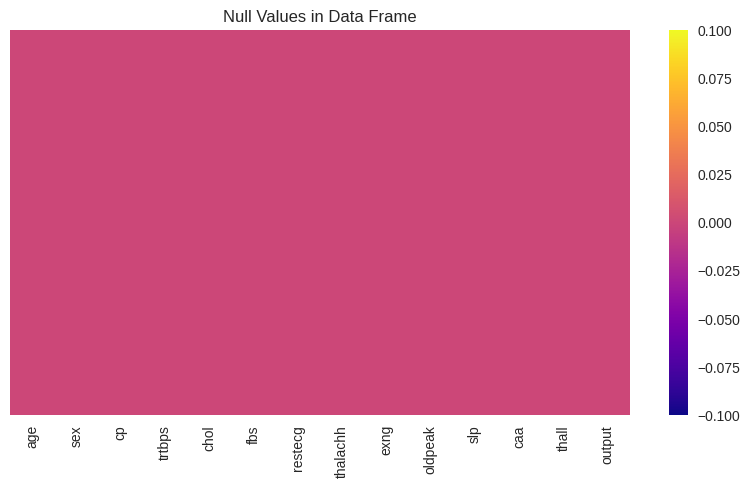

In [11]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'plasma')
plt.title('Null Values in Data Frame')

In [12]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


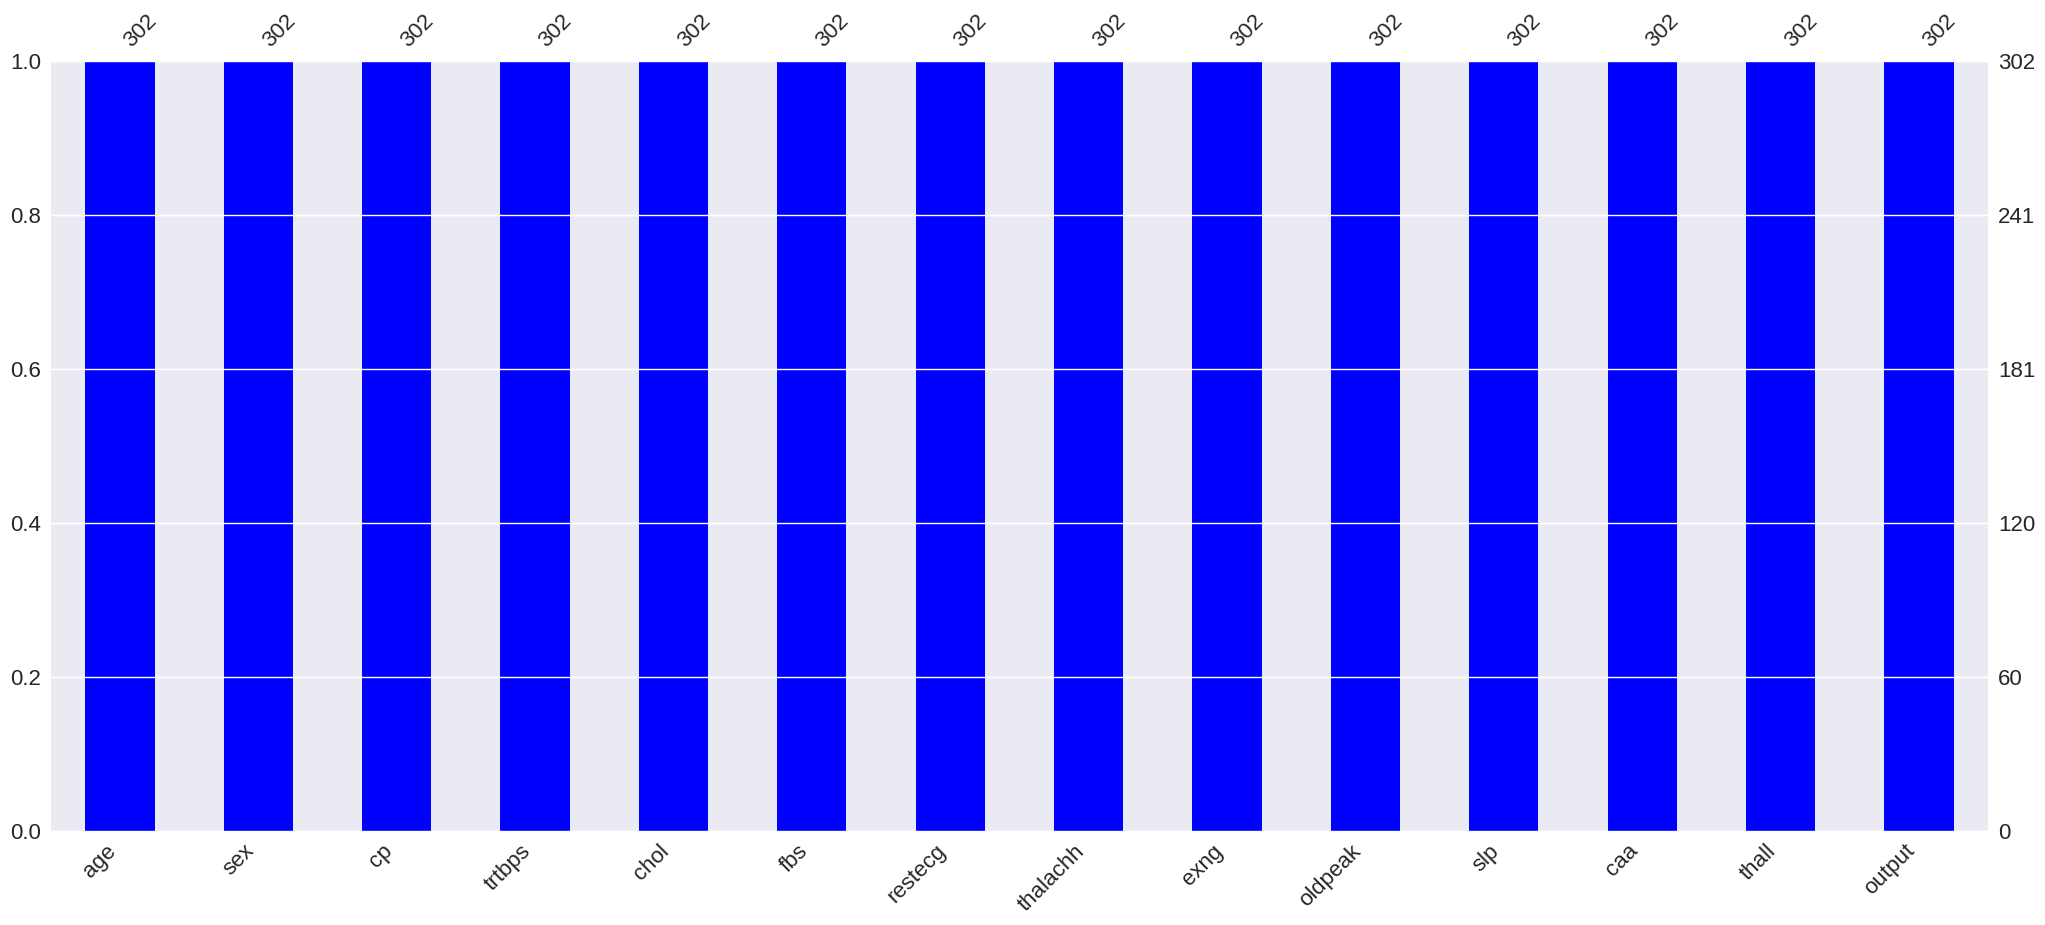

In [13]:
import missingno
missingno.bar(df, color = "b")
plt.show()

In [14]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [15]:
numeric_var = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"]

In [16]:
# We applied the "Describe" method to see the basic statistics of numerical data
df[numeric_var].describe()
# The analyzes we infered from the describe method are below the graphs of each variable below.

,age,trtbps,chol,thalachh,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


In [17]:
numeric_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [18]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", "Cholesterol", "Maximum Heart Rate Achieved", "ST Depression"]

In [19]:
list(zip(numeric_var, numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalachh', 'Maximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

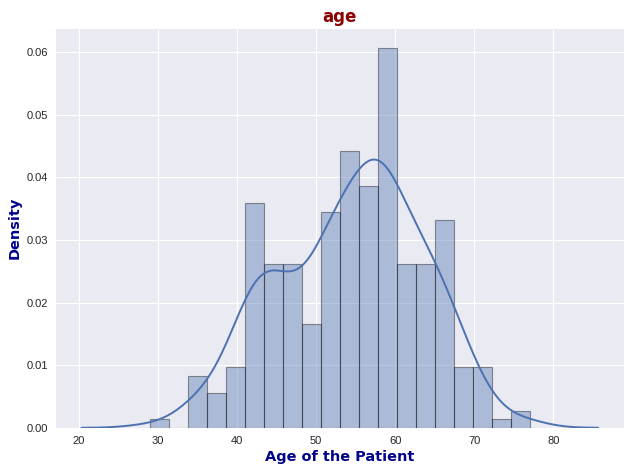

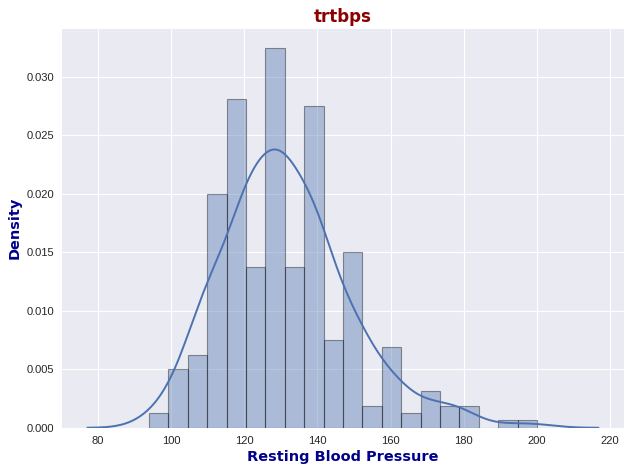

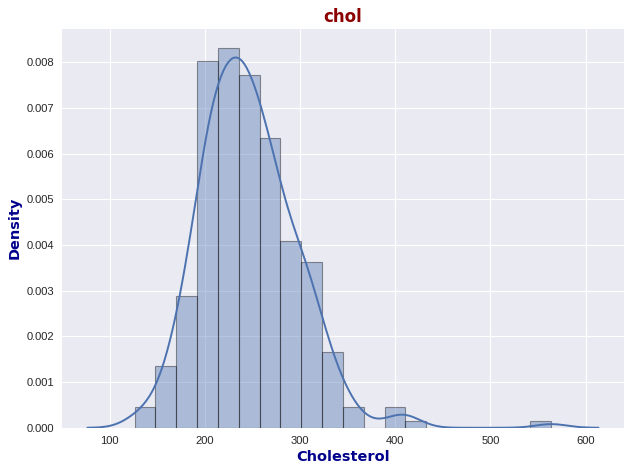

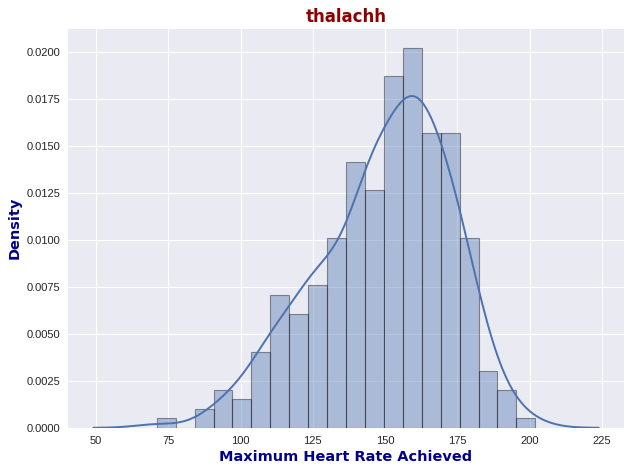

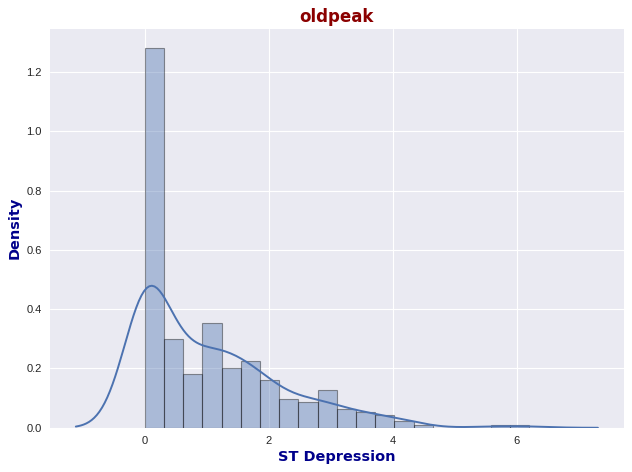

In [20]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)

    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)

    plt.tight_layout()
    plt.show()

In [21]:
categoric_var

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [22]:
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thal", "Target"]

In [23]:
list(zip(categoric_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('restecg', 'Resting Electrocardiographic Results'),
 ('exng', 'Exercise Induced Angina'),
 ('slp', 'The Slope of ST Segment'),
 ('caa', 'Number of Major Vessels'),
 ('thall', 'Thal'),
 ('output', 'Target')]

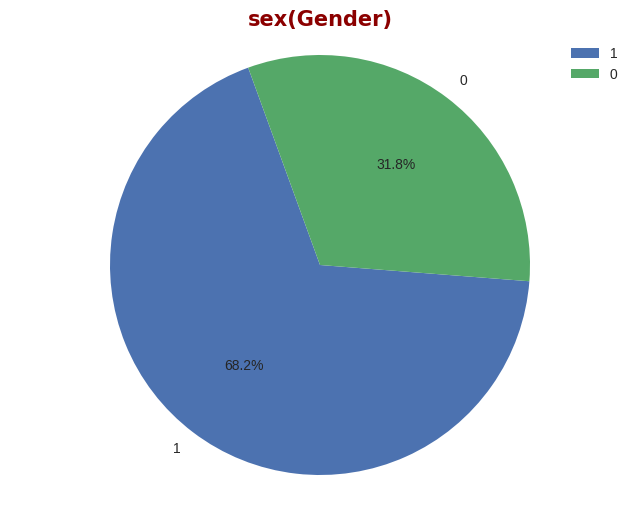

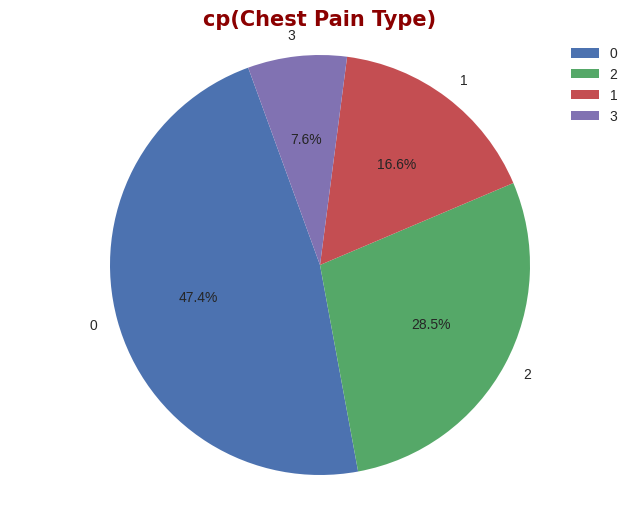

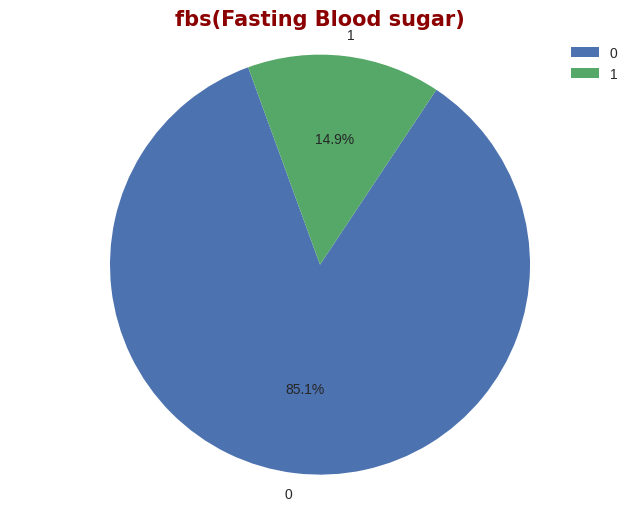

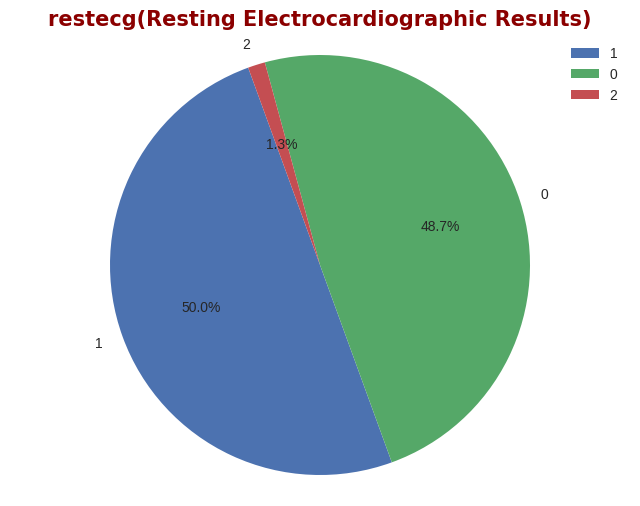

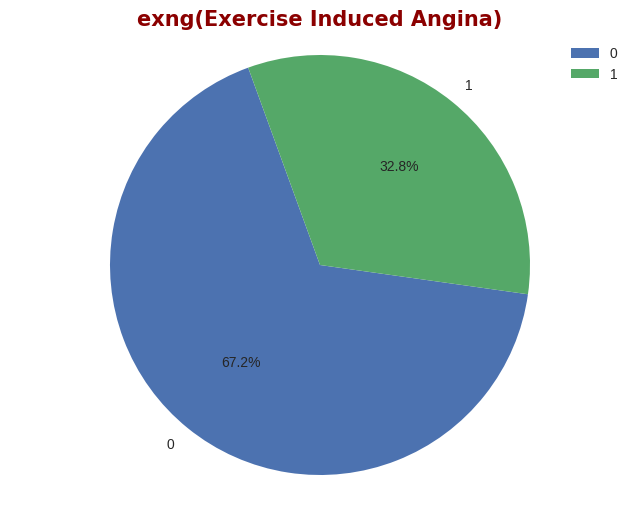

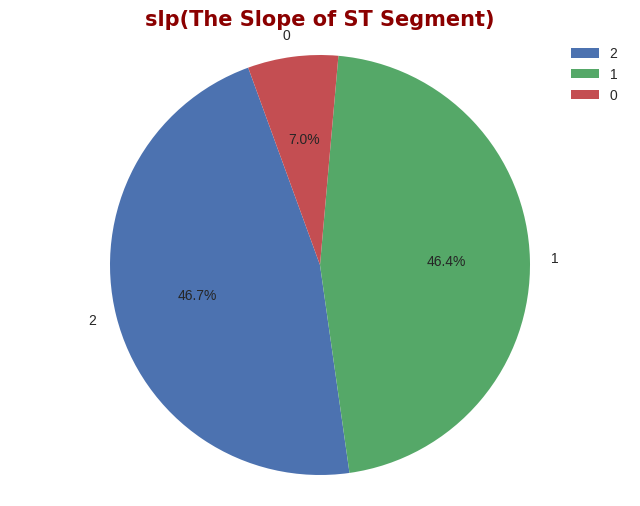

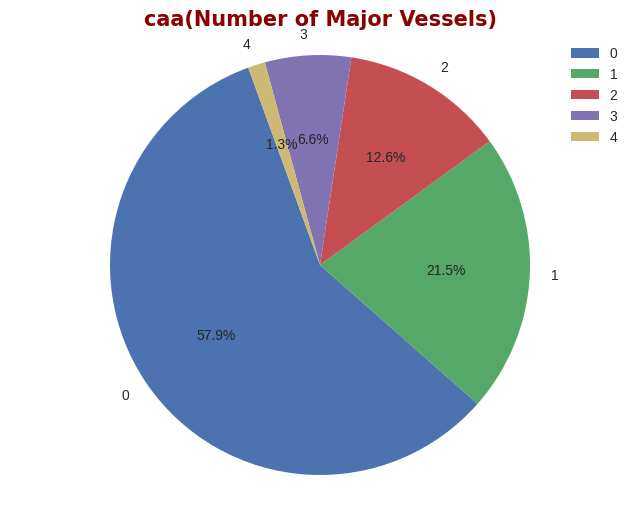

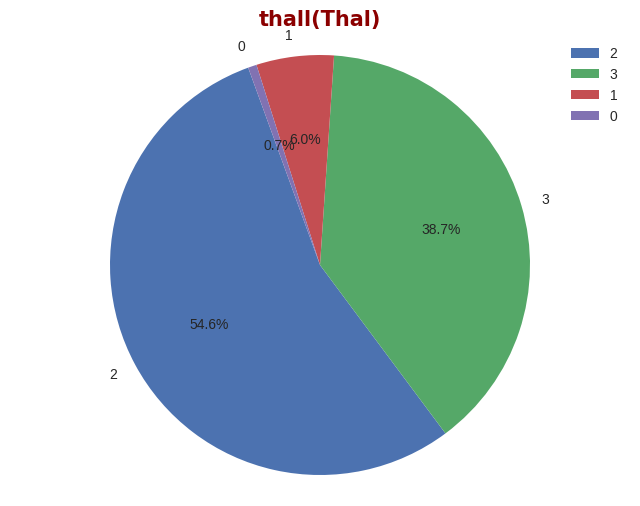

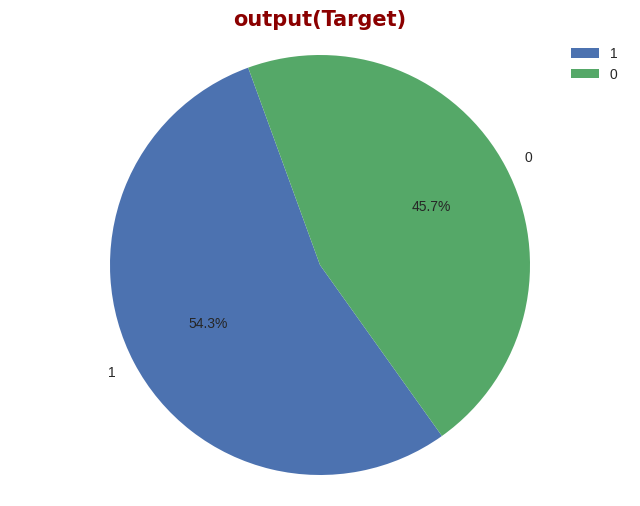

In [24]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8, 6))

    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())

    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title((i + "(" + z + ")"), fontdict = title_font) # Naming Pie Chart Titles
    plt.legend()
    plt.show()

In [25]:
df["thall"].value_counts()

2    165
3    117
1     18
0      2
Name: thall, dtype: int64

In [26]:
df[df["thall"] == 0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [27]:
df["thall"] = df["thall"].replace(0, 2)

In [28]:
df.loc[[48, 281], :]


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


In [29]:
df["caa"].value_counts()

0    175
1     65
2     38
3     20
4      4
Name: caa, dtype: int64

In [30]:
df[df["caa"] == 4]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [31]:
df["caa"] = df["caa"].replace(4, 0)

In [32]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [33]:
df["thall"].value_counts()

2    167
3    117
1     18
Name: thall, dtype: int64

In [34]:
df["caa"].value_counts()

0    179
1     65
2     38
3     20
Name: caa, dtype: int64

In [35]:
numeric_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [36]:
numeric_var.append("output")

In [37]:
numeric_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

In [38]:
df[numeric_var].corr()

,age,trtbps,chol,thalachh,oldpeak,output
age,1.000000,0.283121,0.207216,-0.395235,0.206040,-0.221476
trtbps,0.283121,1.000000,0.125256,-0.048023,0.194600,-0.146269
chol,0.207216,0.125256,1.000000,-0.005308,0.050086,-0.081437
thalachh,-0.395235,-0.048023,-0.005308,1.000000,-0.342201,0.419955
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000,-0.429146
output,-0.221476,-0.146269,-0.081437,0.419955,-0.429146,1.000000


In [39]:
df[numeric_var].corr().iloc[:, [-1]]

,output
age,-0.221476
trtbps,-0.146269
chol,-0.081437
thalachh,0.419955
oldpeak,-0.429146
output,1.000000


In [40]:
df[categoric_var].corr()

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
sex,1.000000,-0.051740,0.046022,-0.060351,0.143460,-0.032990,0.082978,0.213193,-0.283609
cp,-0.051740,1.000000,0.096018,0.041561,-0.392937,0.116854,-0.226091,-0.167628,0.432080
fbs,0.046022,0.096018,1.000000,-0.083081,0.024729,-0.058654,0.139938,-0.011995,-0.026826
restecg,-0.060351,0.041561,-0.083081,1.000000,-0.068807,0.090402,-0.113629,-0.012146,0.134874
exng,0.143460,-0.392937,0.024729,-0.068807,1.000000,-0.256106,0.144385,0.224510,-0.435601
slp,-0.032990,0.116854,-0.058654,0.090402,-0.256106,1.000000,-0.108767,-0.104715,0.343940
caa,0.082978,-0.226091,0.139938,-0.113629,0.144385,-0.108767,1.000000,0.146745,-0.463886
thall,0.213193,-0.167628,-0.011995,-0.012146,0.224510,-0.104715,0.146745,1.000000,-0.362313
output,-0.283609,0.432080,-0.026826,0.134874,-0.435601,0.343940,-0.463886,-0.362313,1.000000


In [41]:
df[categoric_var].corr().iloc[:, [-1]]

,output
sex,-0.283609
cp,0.432080
fbs,-0.026826
restecg,0.134874
exng,-0.435601
slp,0.343940
caa,-0.463886
thall,-0.362313
output,1.000000


In [42]:
numeric_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

In [43]:
numeric_var.remove("output")

In [44]:
df[numeric_var].head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


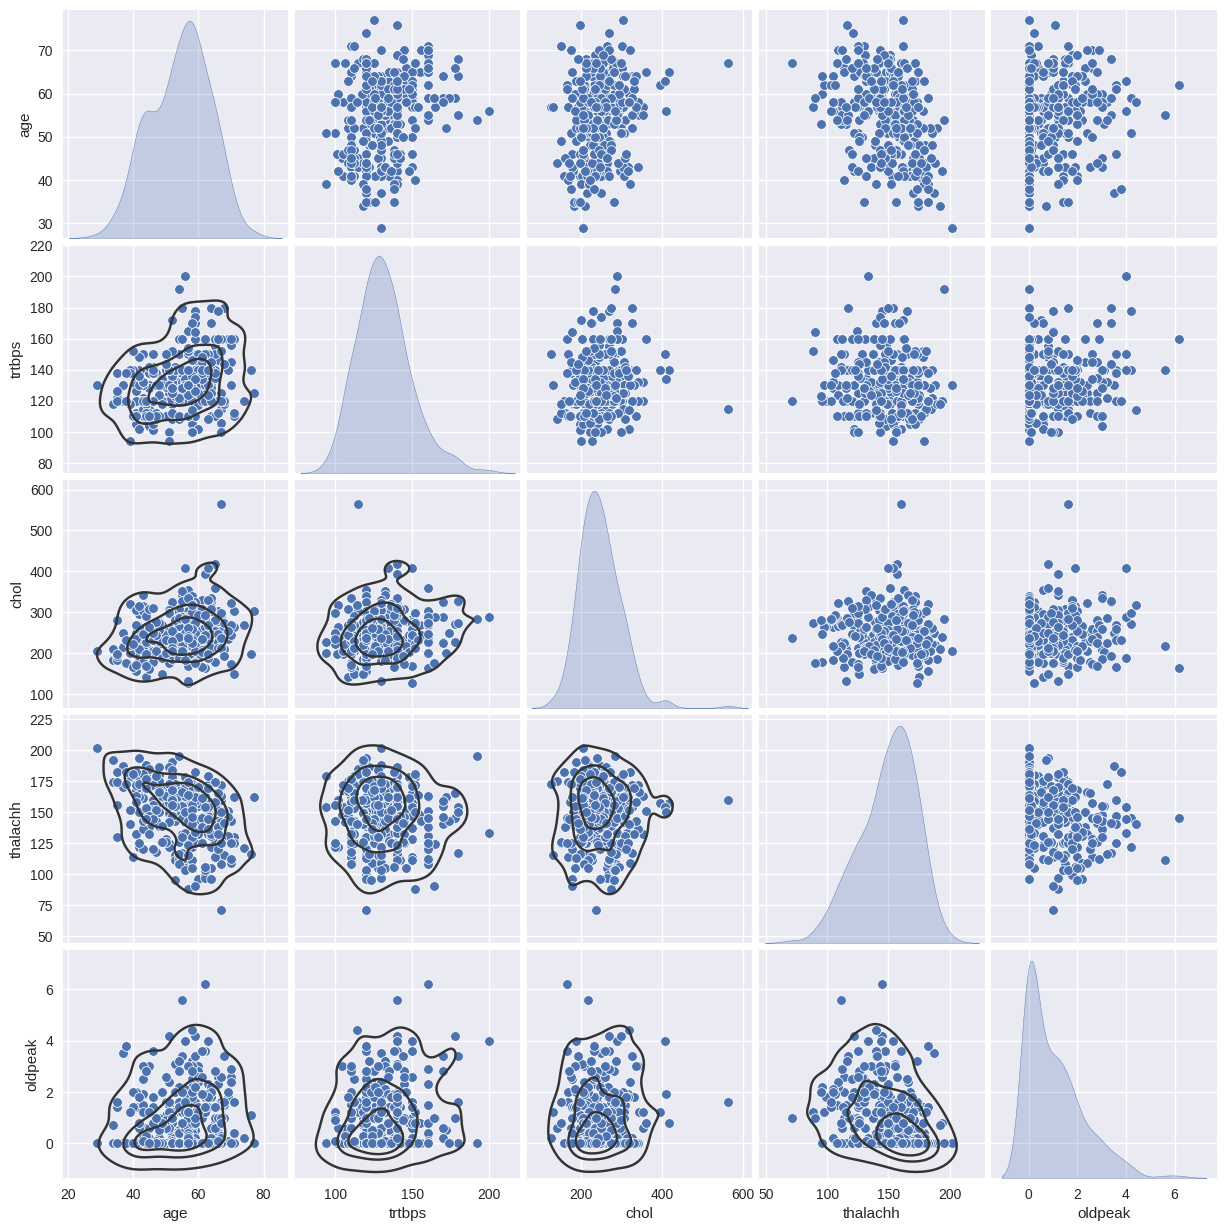

In [45]:
graph = sns.pairplot(df[numeric_var], diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels = 4, color = ".2")
plt.show()

In [46]:
#Scale features using statistics that are robust to outliers
#Feature Scaling with the RobustScaler Method
from sklearn.preprocessing import RobustScaler

In [47]:
robust_scaler = RobustScaler()

In [48]:
scaled_data = robust_scaler.fit_transform(df[numeric_var])

In [49]:
scaled_data

array([[ 0.57692308,  0.75      , -0.11764706, -0.07633588,  0.9375    ],
       [-1.42307692,  0.        ,  0.14901961,  1.05343511,  1.6875    ],
       [-1.11538462,  0.        , -0.57254902,  0.59541985,  0.375     ],
       ...,
       [ 0.96153846,  0.7       , -0.74509804, -0.35114504,  1.625     ],
       [ 0.11538462,  0.        , -1.71764706, -1.14503817,  0.25      ],
       [ 0.11538462,  0.        , -0.07058824,  0.65648855, -0.5       ]])

In [50]:
type(scaled_data)

numpy.ndarray

In [51]:
df_scaled = pd.DataFrame(scaled_data, columns = numeric_var)
df_scaled.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.576923,0.75,-0.117647,-0.076336,0.9375
1,-1.423077,0.00,0.149020,1.053435,1.6875
2,-1.115385,0.00,-0.572549,0.595420,0.3750
3,0.038462,-0.50,-0.070588,0.778626,0.0000
4,0.115385,-0.50,1.780392,0.320611,-0.1250


In [52]:
df_new = pd.concat([df_scaled, df.loc[:, "output"]], axis = 1)

In [53]:
df_new.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.576923,0.75,-0.117647,-0.076336,0.9375,1.0
1,-1.423077,0.00,0.149020,1.053435,1.6875,1.0
2,-1.115385,0.00,-0.572549,0.595420,0.3750,1.0
3,0.038462,-0.50,-0.070588,0.778626,0.0000,1.0
4,0.115385,-0.50,1.780392,0.320611,-0.1250,1.0


In [54]:
melted_data = pd.melt(df_new, id_vars = "output", var_name = "variables", value_name = "value")

In [55]:
melted_data

,output,variables,value
0,1.0,age,0.576923
1,1.0,age,-1.423077
2,1.0,age,-1.115385
3,1.0,age,0.038462
4,1.0,age,0.115385
...,...,...,...
1510,0.0,oldpeak,0.250000
1511,0.0,oldpeak,1.625000
1512,0.0,oldpeak,0.250000
1513,0.0,oldpeak,-0.500000


In [56]:
df_scaled

,age,trtbps,chol,thalachh,oldpeak
0,0.576923,0.75,-0.117647,-0.076336,0.9375
1,-1.423077,0.00,0.149020,1.053435,1.6875
2,-1.115385,0.00,-0.572549,0.595420,0.3750
3,0.038462,-0.50,-0.070588,0.778626,0.0000
4,0.115385,-0.50,1.780392,0.320611,-0.1250
...,...,...,...,...,...
297,0.115385,0.50,0.007843,-0.900763,-0.3750
298,-0.807692,-1.00,0.368627,-0.625954,0.2500
299,0.961538,0.70,-0.745098,-0.351145,1.6250
300,0.115385,0.00,-1.717647,-1.145038,0.2500


In [57]:
df_new2 = pd.concat([df_scaled, df[categoric_var]], axis = 1)

In [58]:
df_new2

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,0.576923,0.75,-0.117647,-0.076336,0.9375,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,-1.423077,0.00,0.149020,1.053435,1.6875,1.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
2,-1.115385,0.00,-0.572549,0.595420,0.3750,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0
3,0.038462,-0.50,-0.070588,0.778626,0.0000,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0
4,0.115385,-0.50,1.780392,0.320611,-0.1250,0.0,0.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.807692,-1.00,0.368627,-0.625954,0.2500,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0
299,0.961538,0.70,-0.745098,-0.351145,1.6250,1.0,3.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0
300,0.115385,0.00,-1.717647,-1.145038,0.2500,1.0,0.0,1.0,1.0,0.0,1.0,2.0,3.0,0.0
301,0.115385,0.00,-0.070588,0.656489,-0.5000,1.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,0.0


In [59]:
df_new2.corr()

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall,output
age,1.000000,0.283121,0.207216,-0.395235,0.206040,-0.060254,-0.086676,0.106361,-0.051361,0.127417,-0.134255,0.201830,0.170810,-0.217563
trtbps,0.283121,1.000000,0.125256,-0.048023,0.194600,0.108038,0.105960,0.089045,-0.091103,0.079130,-0.047199,0.061641,-0.001082,-0.141298
chol,0.207216,0.125256,1.000000,-0.005308,0.050086,-0.061658,-0.071348,0.004578,-0.223382,-0.018397,0.052143,0.061803,0.061846,-0.078901
thalachh,-0.395235,-0.048023,-0.005308,1.000000,-0.342201,-0.000243,0.229347,-0.053112,0.090680,-0.258318,0.226676,-0.249849,-0.191032,0.416482
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000,0.149259,-0.071369,0.049196,-0.209232,0.147918,-0.307018,0.168909,0.188278,-0.428676
sex,-0.060254,0.108038,-0.061658,-0.000243,0.149259,1.000000,-0.051740,0.046022,-0.060351,0.143460,-0.032990,0.082978,0.213193,-0.283609
cp,-0.086676,0.105960,-0.071348,0.229347,-0.071369,-0.051740,1.000000,0.096018,0.041561,-0.392937,0.116854,-0.226091,-0.167628,0.432080
fbs,0.106361,0.089045,0.004578,-0.053112,0.049196,0.046022,0.096018,1.000000,-0.083081,0.024729,-0.058654,0.139938,-0.011995,-0.026826
restecg,-0.051361,-0.091103,-0.223382,0.090680,-0.209232,-0.060351,0.041561,-0.083081,1.000000,-0.068807,0.090402,-0.113629,-0.012146,0.134874
exng,0.127417,0.079130,-0.018397,-0.258318,0.147918,0.143460,-0.392937,0.024729,-0.068807,1.000000,-0.256106,0.144385,0.224510,-0.435601


<Axes: >

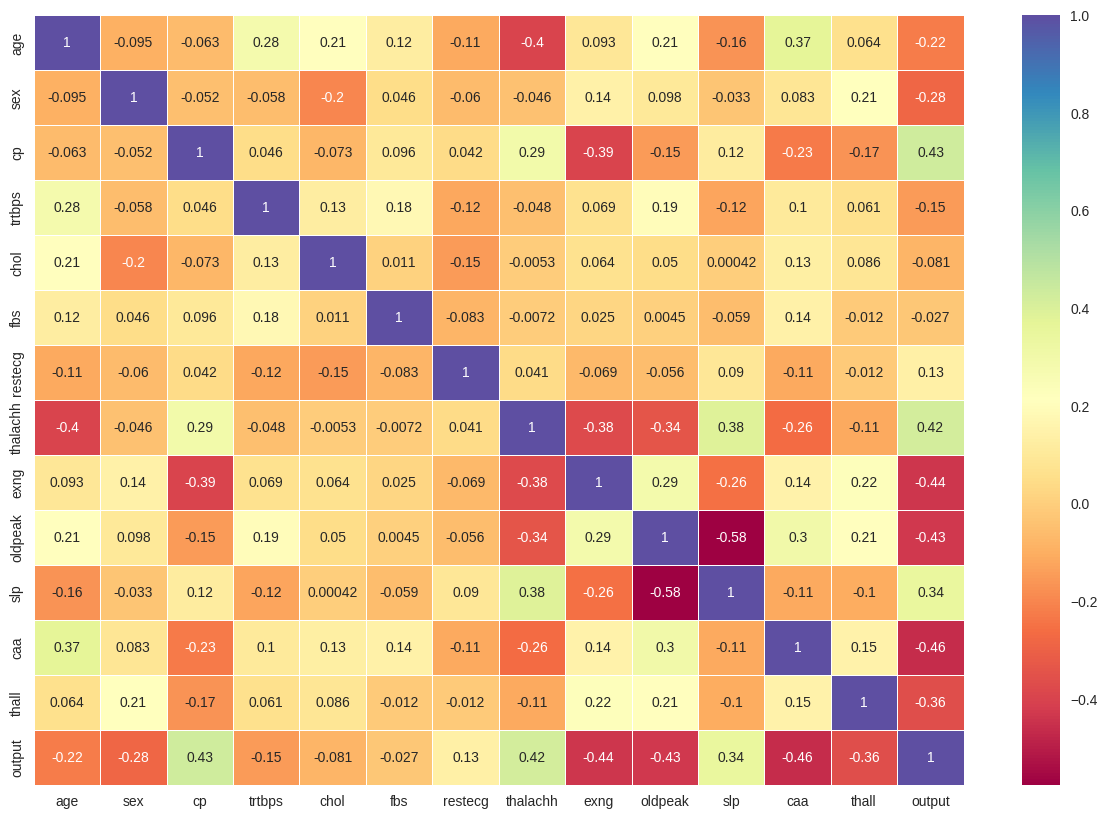

In [60]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df.corr(), cmap = "Spectral", annot = True, linewidths = 0.5)

In [61]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
df.drop(["chol", "fbs", "restecg"], axis = 1, inplace = True)

In [63]:
df.head()

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,150,0,2.3,0,0,1,1
1,37,1,2,130,187,0,3.5,0,0,2,1
2,41,0,1,130,172,0,1.4,2,0,2,1
3,56,1,1,120,178,0,0.8,2,0,2,1
4,57,0,0,120,163,1,0.6,2,0,2,1


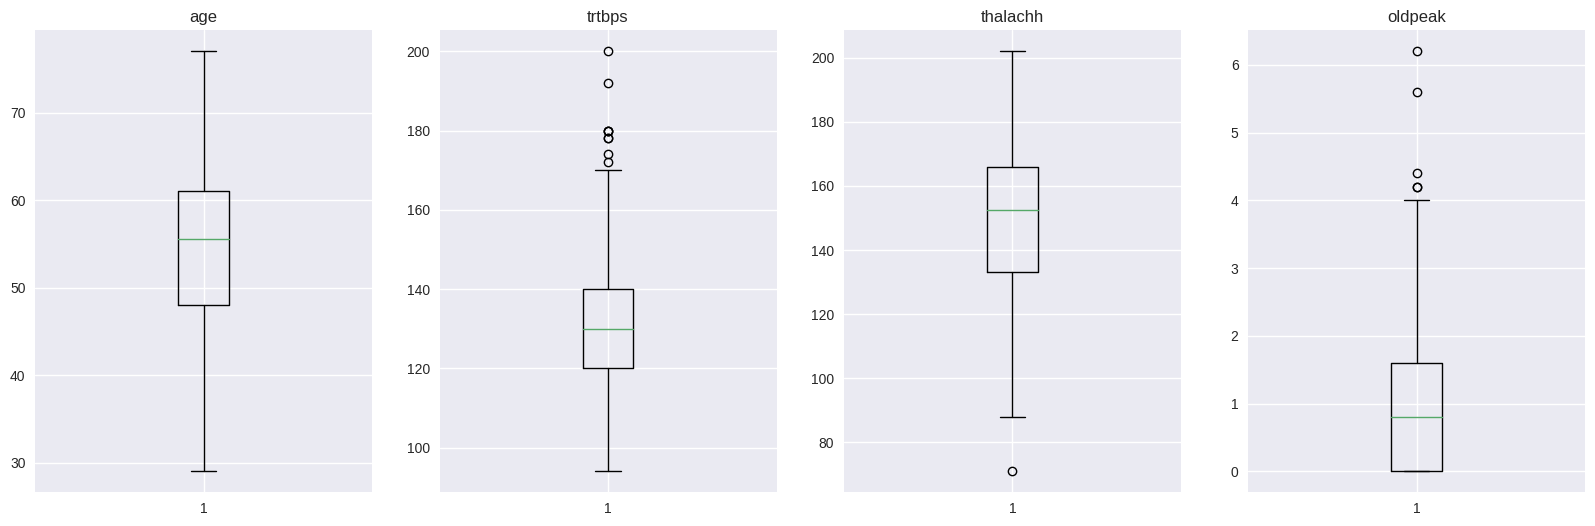

In [64]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalachh"])
ax3.set_title("thalachh")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

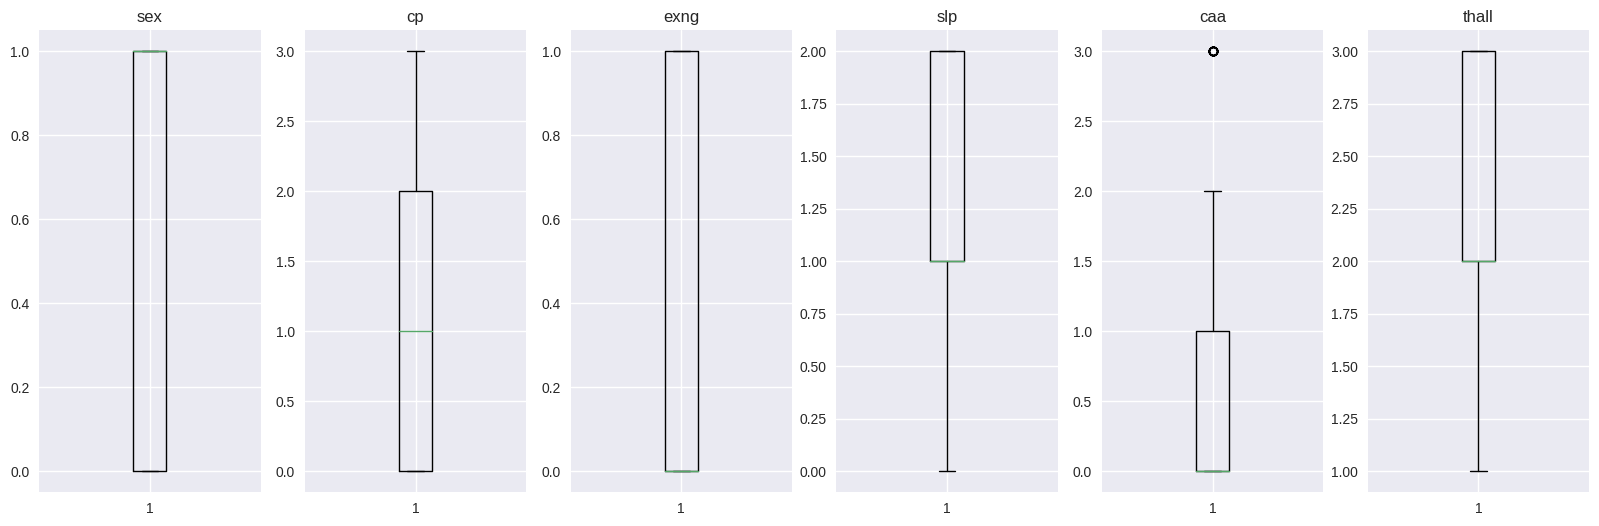

In [65]:
fig, (ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(1, 6, figsize = (20, 6))

ax5.boxplot(df["sex"])
ax5.set_title("sex")

ax6.boxplot(df["cp"])
ax6.set_title("cp")

ax7.boxplot(df["exng"])
ax7.set_title("exng")

ax8.boxplot(df["slp"])
ax8.set_title("slp")

ax9.boxplot(df["caa"])
ax9.set_title("caa")

ax10.boxplot(df["thall"])
ax10.set_title("thall")


plt.show()

In [66]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [67]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print("-------------------")

Threshold Value: 1
Number of Outliers: 51
-------------------
Threshold Value: 2
Number of Outliers: 13
-------------------
Threshold Value: 3
Number of Outliers: 2
-------------------


In [68]:
df[z_scores_trtbps > 2][["trtbps"]]

,trtbps
8,172
101,178
110,180
152,170
195,170
203,180
223,200
228,170
241,174
248,192


In [69]:
df[z_scores_trtbps > 2].trtbps.min()

170

In [70]:
df[df["trtbps"] < 170].trtbps.max()

165

In [71]:
winsorize_percentile_trtbps = (stats.percentileofscore(df["trtbps"], 165)) / 100
print(winsorize_percentile_trtbps)

0.9569536423841061


In [72]:
1 - winsorize_percentile_trtbps

0.043046357615893927

In [73]:
trtbps_winsorize = winsorize(df.trtbps, (0, (1 - winsorize_percentile_trtbps)))

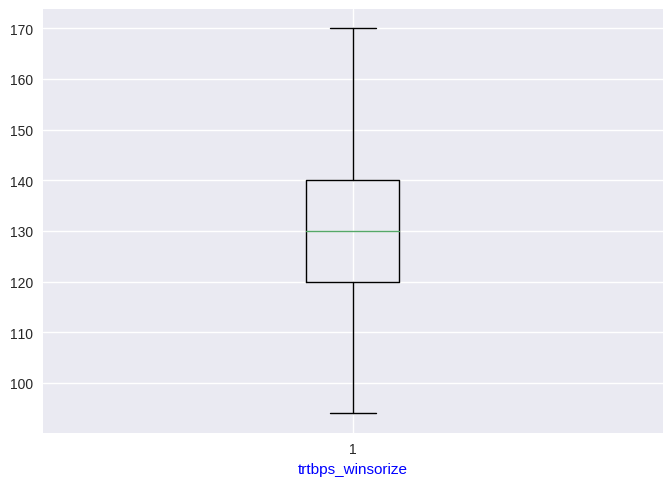

In [74]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color = "b")
plt.show()

In [75]:
df["trtbps_winsorize"] = trtbps_winsorize

In [76]:
df.head()

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output,trtbps_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145
1,37,1,2,130,187,0,3.5,0,0,2,1,130
2,41,0,1,130,172,0,1.4,2,0,2,1,130
3,56,1,1,120,178,0,0.8,2,0,2,1,120
4,57,0,0,120,163,1,0.6,2,0,2,1,120


In [77]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [78]:
thalach_out = iqr(df, "thalachh")

In [79]:
thalach_out

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output,trtbps_winsorize
272,67,1,0,120,71,0,1.0,1,0,2,0,120


In [80]:
df.drop([272], axis = 0, inplace = True)

In [81]:
df["thalachh"][270:275]

271    145
273    156
274    118
275    168
276    105
Name: thalachh, dtype: int64

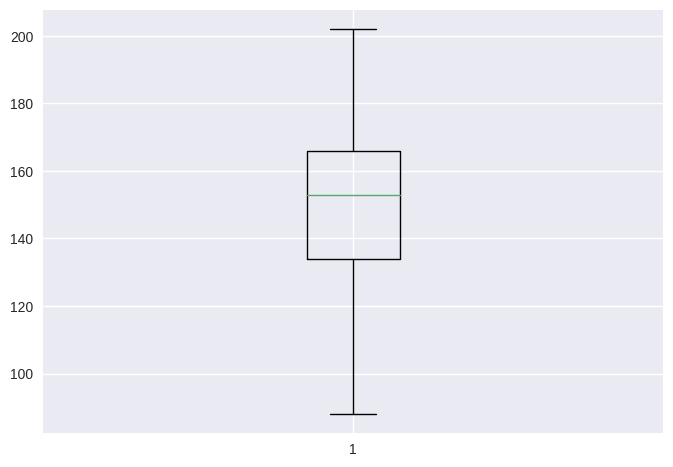

In [82]:
plt.boxplot(df["thalachh"]);

In [83]:
iqr(df, "oldpeak")

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output,trtbps_winsorize
101,59,1,3,178,145,0,4.2,0,0,3,1,170
204,62,0,0,160,145,0,6.2,0,3,3,0,160
221,55,1,0,140,111,1,5.6,0,0,3,0,140
250,51,1,0,140,122,1,4.2,1,3,3,0,140
291,58,1,0,114,140,0,4.4,0,3,1,0,114


In [84]:
df[df["oldpeak"] < 4.2].oldpeak.max()

4.0

In [85]:
winsorize_percentile_oldpeak = (stats.percentileofscore(df["oldpeak"], 4)) / 100
print(winsorize_percentile_oldpeak)

0.9800664451827242


In [86]:
oldpeak_winsorize = winsorize(df.oldpeak, (0, (1 - winsorize_percentile_oldpeak)))

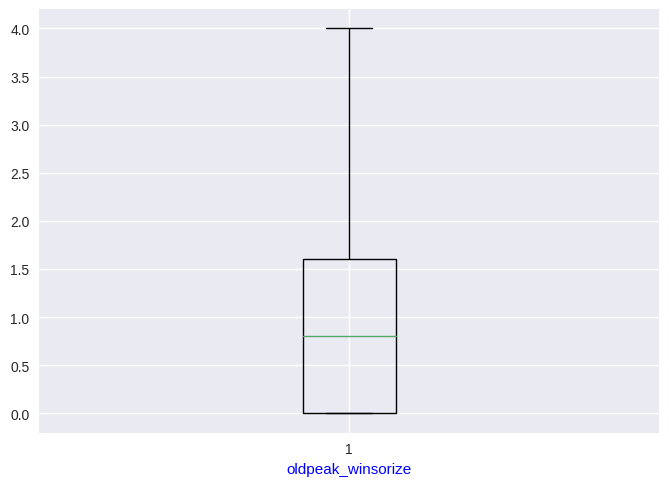

In [87]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize", color = "b")
plt.show()

In [88]:
df["oldpeak_winsorize"] = oldpeak_winsorize

In [89]:
df.head()

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145,2.3
1,37,1,2,130,187,0,3.5,0,0,2,1,130,3.5
2,41,0,1,130,172,0,1.4,2,0,2,1,130,1.4
3,56,1,1,120,178,0,0.8,2,0,2,1,120,0.8
4,57,0,0,120,163,1,0.6,2,0,2,1,120,0.6


In [90]:
df.drop(["trtbps", "oldpeak"], axis = 1, inplace = True)

In [91]:
df.head()

,age,sex,cp,thalachh,exng,slp,caa,thall,output,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


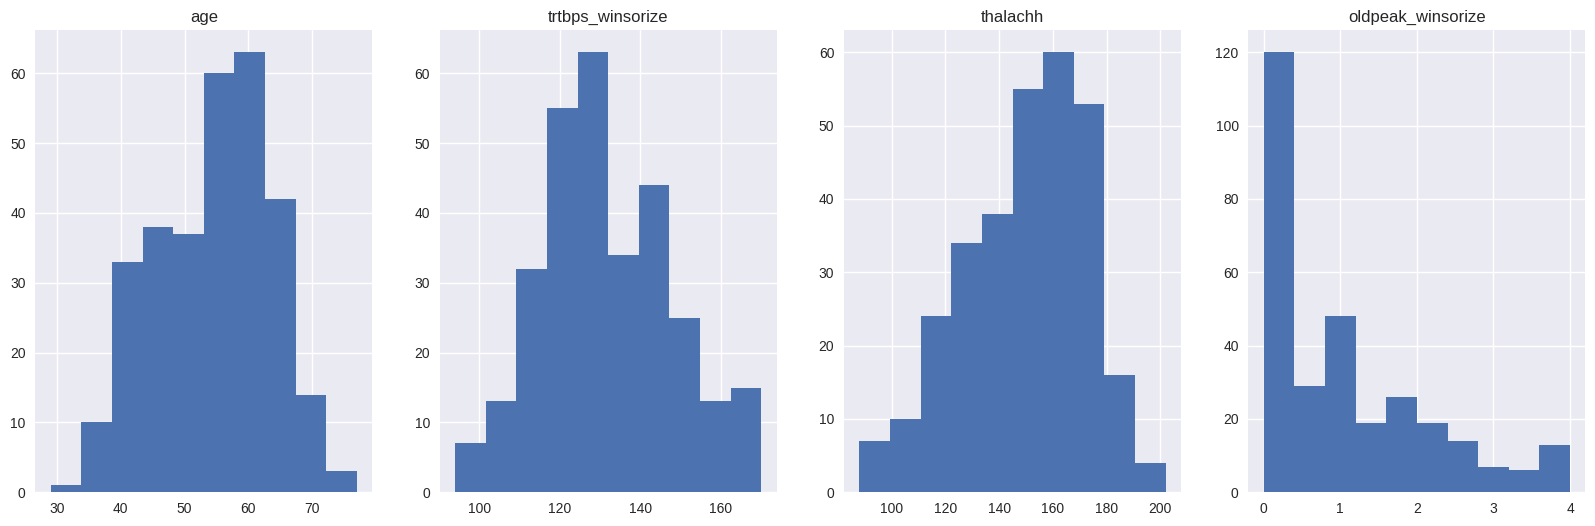

In [92]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.hist(df["age"])
ax1.set_title("age")

ax2.hist(df["trtbps_winsorize"])
ax2.set_title("trtbps_winsorize")

ax3.hist(df["thalachh"])
ax3.set_title("thalachh")

ax4.hist(df["oldpeak_winsorize"])
ax4.set_title("oldpeak_winsorize")

plt.show()

In [93]:
#Transformation Operations on Unsymmetrical Data
#.agg() is used to pass a function or list of function to be applied on a series
df[["age", "trtbps_winsorize", "thalachh", "oldpeak_winsorize"]].agg(["skew"]).transpose()

,skew
age,-0.200480
trtbps_winsorize,0.384379
thalachh,-0.456624
oldpeak_winsorize,0.992018


In [94]:
df["oldpeak_winsorize_log"] = np.log(df["oldpeak_winsorize"])
df["oldpeak_winsorize_sqrt"] = np.sqrt(df["oldpeak_winsorize"])

In [95]:
df.head()

,age,sex,cp,thalachh,exng,slp,caa,thall,output,trtbps_winsorize,oldpeak_winsorize,oldpeak_winsorize_log,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,2.3,0.832909,1.516575
1,37,1,2,187,0,0,0,2,1,130,3.5,1.252763,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.4,0.336472,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.8,-0.223144,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.6,-0.510826,0.774597


In [96]:
df[["oldpeak_winsorize", "oldpeak_winsorize_log", "oldpeak_winsorize_sqrt"]].agg(["skew"]).transpose()

,skew
oldpeak_winsorize,0.992018
oldpeak_winsorize_log,NaN
oldpeak_winsorize_sqrt,0.103263


In [97]:
df.drop(["oldpeak_winsorize", "oldpeak_winsorize_log"], axis = 1, inplace = True)

In [98]:
df.head()

,age,sex,cp,thalachh,exng,slp,caa,thall,output,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


In [99]:
#Applying One Hot Encoding Method to Categorical Variables
df_copy = df.copy()

In [100]:
df_copy.head()

,age,sex,cp,thalachh,exng,slp,caa,thall,output,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


In [101]:
categoric_var

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [102]:
categoric_var.remove("fbs")
categoric_var.remove("restecg")

In [103]:
categoric_var

['sex', 'cp', 'exng', 'slp', 'caa', 'thall', 'output']

In [104]:
df_copy = pd.get_dummies(df_copy, columns = categoric_var[:-1], drop_first = True)

In [105]:
df_copy.head()

,age,thalachh,output,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,thall_2,thall_3
0,63,150,1,145,1.516575,1,0,0,1,0,0,0,0,0,0,0,0
1,37,187,1,130,1.870829,1,0,1,0,0,0,0,0,0,0,1,0
2,41,172,1,130,1.183216,0,1,0,0,0,0,1,0,0,0,1,0
3,56,178,1,120,0.894427,1,1,0,0,0,0,1,0,0,0,1,0
4,57,163,1,120,0.774597,0,0,0,0,1,0,1,0,0,0,1,0


In [106]:
new_numeric_var = ["age", "thalachh", "trtbps_winsorize", "oldpeak_winsorize_sqrt"]

In [107]:
#Feature Scaling with the RobustScaler Method for Machine Learning Algorithms
robus_scaler = RobustScaler()

In [108]:
df_copy[new_numeric_var] = robust_scaler.fit_transform(df_copy[new_numeric_var])

In [109]:
df_copy.head()

,age,thalachh,output,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,thall_2,thall_3
0,0.615385,-0.09375,1,0.75,0.491851,1,0,0,1,0,0,0,0,0,0,0,0
1,-1.384615,1.06250,1,0.00,0.771913,1,0,1,0,0,0,0,0,0,0,1,0
2,-1.076923,0.59375,1,0.00,0.228308,0,1,0,0,0,0,1,0,0,0,1,0
3,0.076923,0.78125,1,-0.50,0.000000,1,1,0,0,0,0,1,0,0,0,1,0
4,0.153846,0.31250,1,-0.50,-0.094734,0,0,0,0,1,0,1,0,0,0,1,0


In [110]:
#Separating Data into Test and Training Set
X = df_copy.drop(["output"], axis = 1)
y = df_copy[["output"]]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [112]:
X_train.head()

,age,thalachh,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,thall_2,thall_3
5,0.153846,-0.15625,0.50,-0.207107,1,0,0,0,0,1,0,0,0,0,0,0
101,0.307692,-0.25000,2.00,0.874032,1,0,0,1,0,0,0,0,0,0,0,1
115,-1.384615,0.53125,-0.50,-0.707107,0,0,1,0,0,0,1,0,0,0,1,0
38,0.769231,-0.15625,1.25,0.000000,0,0,1,0,0,0,1,0,0,0,1,0
246,0.076923,-0.09375,0.20,0.382618,0,0,0,0,1,1,0,0,1,0,0,1


In [113]:
y_train.head()

,output
5,1
101,1
115,1
38,1
246,0


In [114]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 270
X_test: 31
y_train: 270
y_test: 31


In [115]:
#Logistic Regression Algorithm
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [116]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [117]:
y_pred = log_reg.predict(X_test)

In [118]:
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1])

In [119]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8709677419354839


In [120]:
#Cross Validation
scores = cross_val_score(log_reg, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7833333333333334


In [121]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.89      0.89      0.89        19

    accuracy                           0.87        31
   macro avg       0.86      0.86      0.86        31
weighted avg       0.87      0.87      0.87        31



In [122]:
#Hyperparameter Optimization(with GridSearchCV)
log_reg_new = LogisticRegression()
log_reg_new

LogisticRegression()

In [123]:
parameters = {"penalty":["l1","l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [124]:
log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)

In [125]:
log_reg_grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [126]:
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l1', 'solver': 'liblinear'}


In [127]:
log_reg_new2 = LogisticRegression(penalty = "l1", solver = "saga")
log_reg_new2

LogisticRegression(penalty='l1', solver='saga')

In [128]:
log_reg_new2.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='saga')

In [129]:
y_pred = log_reg_new2.predict(X_test)

In [130]:
print("The test accuracy score of Logistic Regression After hyper-parameter tuning is: {}".format(accuracy_score(y_test, y_pred)))

The test accuracy score of Logistic Regression After hyper-parameter tuning is: 0.8709677419354839


<Axes: >

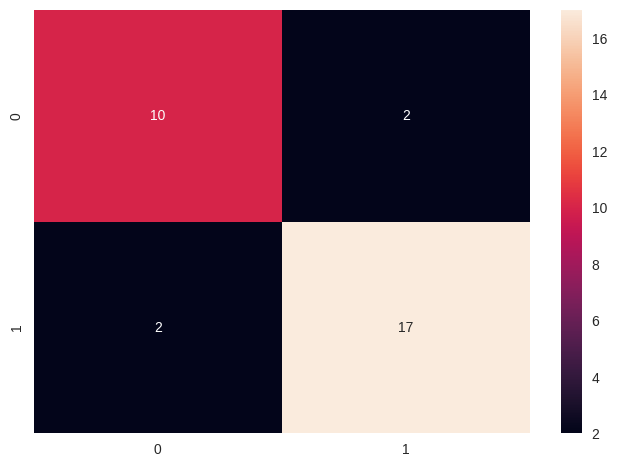

In [131]:
log = confusion_matrix(y_test, y_pred)
sns.heatmap(log, annot = True, fmt = "d")

In [132]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.89      0.89      0.89        19

    accuracy                           0.87        31
   macro avg       0.86      0.86      0.86        31
weighted avg       0.87      0.87      0.87        31



In [133]:
#Decision Tree Algorithm
dec_tree = DecisionTreeClassifier(random_state = 5)

In [134]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [135]:
y_pred = dec_tree.predict(X_test)

In [136]:
print("The test accuracy score of Decision Tree is:", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is: 0.8064516129032258


In [137]:
scores = cross_val_score(dec_tree, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.5916666666666666


<Axes: >

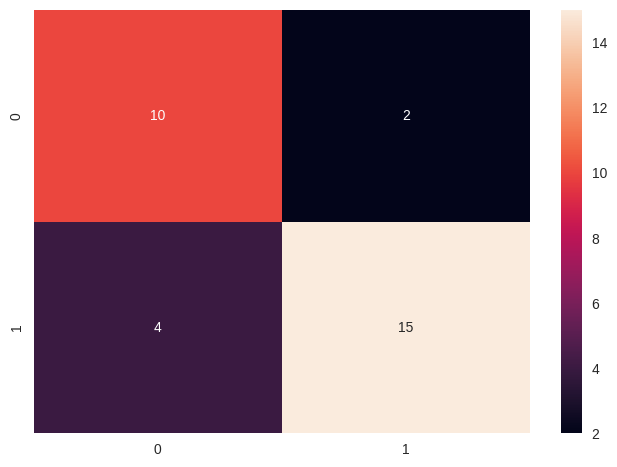

In [138]:
DT = confusion_matrix(y_test, y_pred)
sns.heatmap(DT, annot = True, fmt = "d")

In [139]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.88      0.79      0.83        19

    accuracy                           0.81        31
   macro avg       0.80      0.81      0.80        31
weighted avg       0.82      0.81      0.81        31



In [140]:
#Support Vector Machine Algorithm
svc_model = SVC(random_state = 5)

In [141]:
svc_model.fit(X_train, y_train)

SVC(random_state=5)

In [142]:
svc_model.fit(X_train, y_train)

SVC(random_state=5)

In [143]:
print("The test accuracy score of SVM is:", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is: 0.8064516129032258


In [144]:
scores = cross_val_score(svc_model, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8083333333333333


<Axes: >

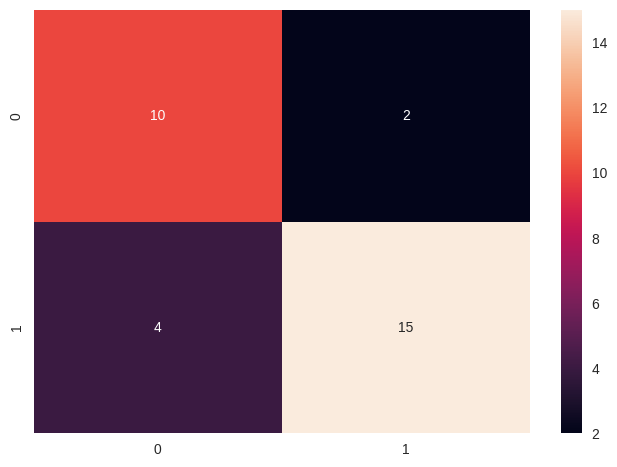

In [145]:
SVC_CM = confusion_matrix(y_test, y_pred)
sns.heatmap(SVC_CM, annot = True, fmt = "d")

In [146]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.88      0.79      0.83        19

    accuracy                           0.81        31
   macro avg       0.80      0.81      0.80        31
weighted avg       0.82      0.81      0.81        31



In [147]:
#Random Forest Algorithm
random_forest = RandomForestClassifier(random_state = 5)

In [148]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [149]:
y_pred_RF = random_forest.predict(X_test)

In [150]:
print("The test accuracy score of Random Forest is", accuracy_score(y_test, y_pred_RF))

The test accuracy score of Random Forest is 0.8387096774193549


In [151]:
scores = cross_val_score(random_forest, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7416666666666667


<Axes: >

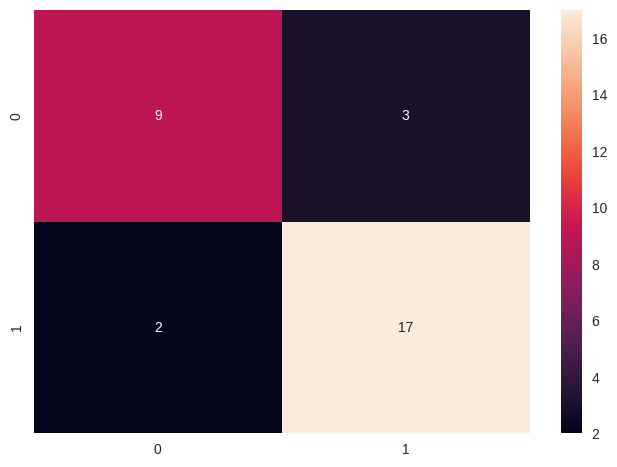

In [152]:
RF = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(RF, annot = True, fmt = "d")

In [153]:
print(metrics.classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.85      0.89      0.87        19

    accuracy                           0.84        31
   macro avg       0.83      0.82      0.83        31
weighted avg       0.84      0.84      0.84        31



In [154]:
#Hyperparameter Optimization(with GridSearchCV)
random_forest_new = RandomForestClassifier(random_state = 5)
random_forest_new

RandomForestClassifier(random_state=5)

In [155]:
parameters = {"n_estimators" : [50, 100, 150, 200],
              "criterion" : ["gini", "entropy"],
              'max_features': ['auto', 'sqrt', 'log2'],
              'bootstrap': [True, False]}

In [156]:
random_forest_grid = GridSearchCV(random_forest_new, param_grid = parameters)

In [157]:
random_forest_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [158]:
print("Best Parameters:", random_forest_grid.best_params_)

Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 150}


In [159]:
random_forest_new2 = RandomForestClassifier(bootstrap = True, criterion = "entropy", max_features = "auto", n_estimators = 200, random_state = 5)

In [160]:
random_forest_new2 = RandomForestClassifier(n_estimators = 500, max_depth = 5, max_features = 'sqrt', random_state = 42)

In [161]:
print("Best Parameters:", random_forest_grid.best_params_)

Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 150}


In [162]:
random_forest_new2 = RandomForestClassifier(bootstrap = True, criterion = "entropy", max_features = "auto", n_estimators = 200, random_state = 5)

In [163]:
random_forest_new2 = RandomForestClassifier(n_estimators = 500, max_depth = 5, max_features = 'sqrt', random_state = 42)

In [164]:
random_forest_new2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=42)

In [165]:
y_pred = random_forest_new2.predict(X_test)

In [166]:
print("The test accuracy score of Random Forest after hyper-parameter tuning is:", accuracy_score(y_test, y_pred))


The test accuracy score of Random Forest after hyper-parameter tuning is: 0.8387096774193549


<Axes: >

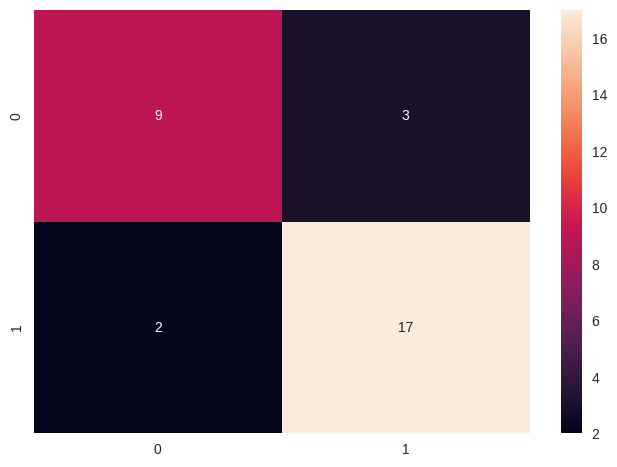

In [167]:
RF = confusion_matrix(y_test, y_pred)
sns.heatmap(RF, annot = True, fmt = "d")

In [168]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.85      0.89      0.87        19

    accuracy                           0.84        31
   macro avg       0.83      0.82      0.83        31
weighted avg       0.84      0.84      0.84        31



In [169]:
#Ada Boost Classifier
abc = AdaBoostClassifier(n_estimators = 50,
                         learning_rate = 1,
                         random_state = 777)

In [170]:
abc.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, random_state=777)

In [171]:
y_pred_abc = abc.predict(X_test)

In [172]:
acc = accuracy_score(y_test, y_pred_abc)

In [173]:
print('AdaBoost Classifier Model Accuracy is:',acc)

AdaBoost Classifier Model Accuracy is: 0.9032258064516129


In [174]:
scores = cross_val_score(abc, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7166666666666667


<Axes: >

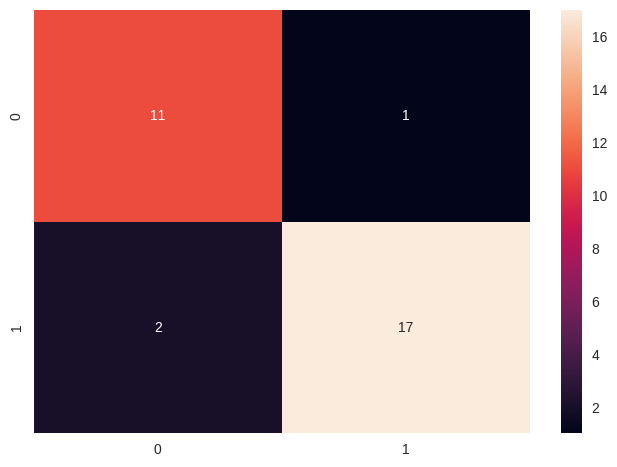

In [175]:
abc = confusion_matrix(y_test, y_pred_abc)
sns.heatmap(abc, annot = True, fmt="d")

In [176]:
print(metrics.classification_report(y_test, y_pred_abc))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.94      0.89      0.92        19

    accuracy                           0.90        31
   macro avg       0.90      0.91      0.90        31
weighted avg       0.91      0.90      0.90        31



In [177]:
#Gradient Boosting Classifier
gb = GradientBoostingClassifier()

In [178]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [179]:
gb_pred = gb.predict(X_test)

In [180]:
acc = accuracy_score(y_test, gb_pred)

In [181]:
print("Gradient Boosting Classifier Model Accuracy score is:", acc)

Gradient Boosting Classifier Model Accuracy score is: 0.8709677419354839


In [182]:
scores = cross_val_score(gb, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7166666666666666


<Axes: >

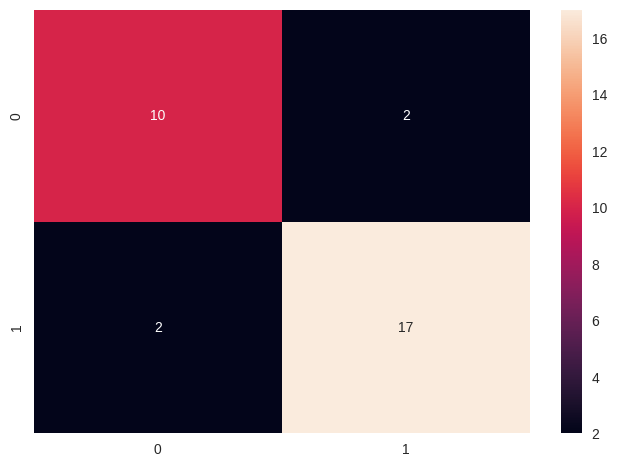

In [183]:
cm = confusion_matrix(y_test, gb_pred)
sns.heatmap(cm, annot = True, fmt="d")

In [184]:
print(metrics.classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.89      0.89      0.89        19

    accuracy                           0.87        31
   macro avg       0.86      0.86      0.86        31
weighted avg       0.87      0.87      0.87        31



In [185]:
from sklearn.ensemble import VotingClassifier
#Voting Classifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()

In [186]:
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')

In [187]:
eclf1.fit(X_train, y_train)

VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                             ('lr', LogisticRegression()),
                             ('abc', AdaBoostClassifier())],
                 voting='soft')

In [188]:
predictions = eclf1.predict(X_test)
print("Voting Classifier Accuracy Score is: ")
print(accuracy_score(y_test, predictions))

Voting Classifier Accuracy Score is: 
0.8709677419354839


In [189]:
scores = cross_val_score(eclf1, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7166666666666666


<Axes: >

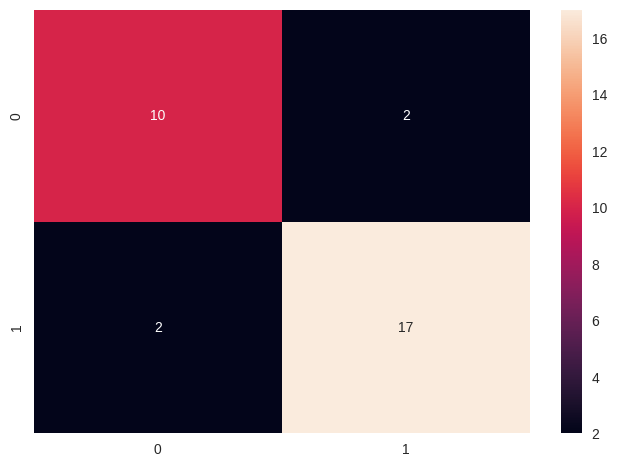

In [190]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt="d")

In [191]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.89      0.89      0.89        19

    accuracy                           0.87        31
   macro avg       0.86      0.86      0.86        31
weighted avg       0.87      0.87      0.87        31

